# Feature Selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

final_train = pd.read_csv('./dataset/final_train_dataset.csv')

In [3]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [4]:
X = final_train.loc[:, ['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]

In [5]:
X.shape

(5872, 21)

In [6]:
y = final_train.loc[:, ['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


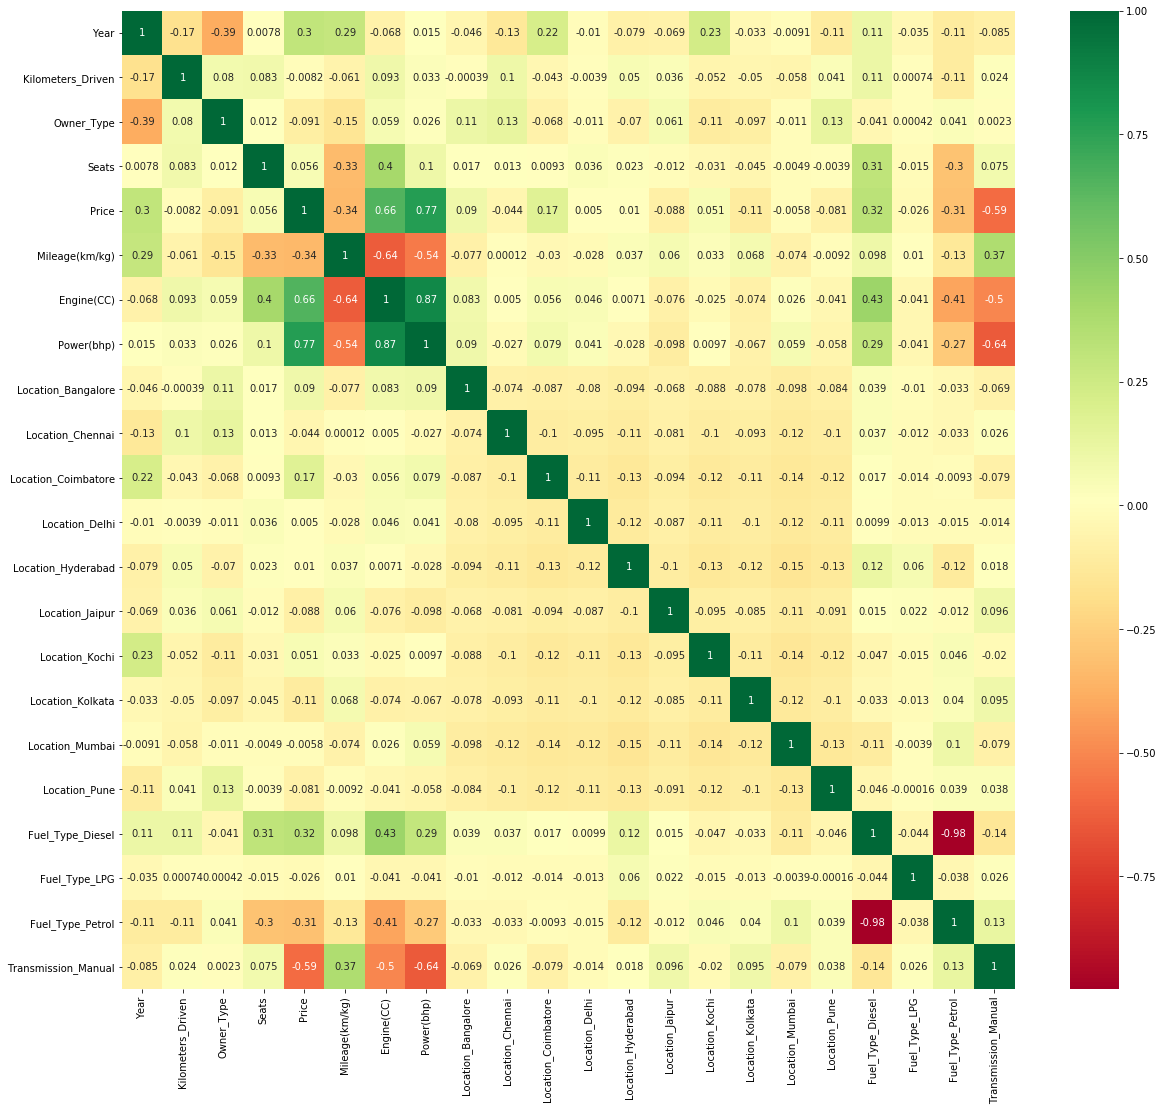

In [10]:
plt.figure(figsize = (20,18))
sns.heatmap(final_train.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

# Model

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [12]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_val)
print('Accuracy on Training set: ', linear_reg.score(X_train, y_train))
print('Accuracy on Validation set: ', linear_reg.score(X_val, y_val))

Accuracy on Training set:  0.7083070284244637
Accuracy on Validation set:  0.6991016530826974


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_val)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_val,y_val))
print(y_pred)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on Traing set:  0.9823797756332426
Accuracy on Testing set:  0.9107332747570768
[14.0696  6.9173 11.0714 ...  6.0452  3.8197  5.1588]


In [14]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_val, y_pred))

		Error Table
Mean Absolute Error      :  1.5048035906788249
Mean Squared  Error      :  10.461204992395041
Root Mean Squared  Error :  3.234378609933451
R Squared Error          :  0.9107332747570768


In [15]:
test_data = pd.read_csv('./dataset/final_test_dataset.csv')
test_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,32.26,998.0,58.20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,5.0,24.70,796.0,47.30,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,7.0,13.68,2393.0,147.80,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2014,29000,1,5.0,18.50,1197.0,82.85,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2016,85609,2,7.0,16.00,2179.0,140.00,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [19]:
final_y_pred= rf_reg.predict(test_data)

In [20]:
print(final_y_pred)

[ 3.125    3.0888  17.2738  ...  3.2478   4.1585  16.79085]
